# Установка и импорт необходимых моуделй

In [1]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 40.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=01065acd654cb4b25bf303951ce82f6bfa170701c9803548481908c722dcb00f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# при работе через Google Colab
# прописать путь до всех файлов py
import sys
sys.path.append('/content/drive/MyDrive/Учёба/8 семестр/диплом/Проект/VKR/Блокноты')

In [4]:
import AnalysisFunc
import BaseFuncs

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import scipy.stats as stats
figure(figsize=(30, 40), dpi=80)

<Figure size 2400x3200 with 0 Axes>

<Figure size 2400x3200 with 0 Axes>

In [6]:
path_to_data = "/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/"

# ИНФО

**Считывание файла**

`BaseFuncs.GetDataFrameListFromFileConverted(file_name)`

**Сохранение файла**

`BaseFuncs.SaveFileCSV(path, filename, results, csv = True)`

**Сделать столбцы float**

`AnalysisFunc.MakeFloat(data, addition_list_columns)`

`addition_list_columns` - дополнительные колонки для конвертирования

**Разделить столбцы на 100**

`AnalysisFunc.ModColumns100(data, columns)`

**Нарисовать графики распределения и BoxPlot**

`AnalysisFunc.DrawPlots(data)`

**Удалить выбросы через квартили**

`AnalysisFunc.DeleteByQuantile(data, q1 = 0.15)`

**Удалить выбросы через Z-значения**

`AnalysisFunc.DeleteByZ(data)`

**Столбце "*Баллы*" заменить на оценки**

`AnalysisFunc.CountMarkColumn(data)`

# Загрузка данных прошлого года

In [8]:
data = BaseFuncs.GetDataFrameListFromFileConverted(path_to_data+"Программирование и основы алгоритмизации 1.csv")
print(f"Длина файла до обработки: {len(data)}")
AnalysisFunc.FillColumnsList(data)
data = AnalysisFunc.MakeFloat(data, ["Пол"])
data = data.drop(data.columns.difference(["Не сдал(-а)", "Пол"]+AnalysisFunc.GetAllColumnsTests(data)), axis=1)
data_before_min_max = data.copy()
columns_to_scale =  AnalysisFunc.exams + AnalysisFunc.countscores + AnalysisFunc.sqrt_vars
data[columns_to_scale] = AnalysisFunc.MinMaxColumns(data, columns_to_scale)
data[AnalysisFunc.scores] = data[AnalysisFunc.scores].div(100)
print(f"Сдали: {len(data[data['Не сдал(-а)']==0])}, не сдали: {len(data[data['Не сдал(-а)']==1])}")
data.head(5)

Длина файла до обработки: 961
Сдали: 612, не сдали: 349


,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Корень дисперсии баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Корень дисперсии баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Корень дисперсии баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,0.160,0.888889,0.216933,0.600,1.0,0.060,0.75,0.000000,0.6000,0.43,0.10,0.833333,0.159034,0.600
1,1.0,1,1.00,0.035,0.333333,0.269942,0.369,1.0,0.012,0.50,0.045264,0.2245,1.00,0.00,0.000000,0.000000,0.375
2,1.0,1,0.00,0.000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000
3,0.0,0,1.00,0.150,0.888889,0.208160,0.585,1.0,0.060,0.75,0.133156,0.5900,1.00,0.08,0.666667,0.201164,0.775
4,0.0,0,0.86,0.160,0.888889,0.422833,0.224,0.5,0.060,0.75,0.000000,0.5040,1.00,0.08,0.666667,0.201164,0.750


In [9]:
# data[AnalysisFunc.scores] = AnalysisFunc.ModColumns100(data, AnalysisFunc.scores)
# data[AnalysisFunc.exams] = data[AnalysisFunc.exams].div(20)
for i, lst in enumerate([AnalysisFunc.exams, AnalysisFunc.scores, AnalysisFunc.being, AnalysisFunc.before]):
    for name in lst:
        print(f"{name}: Max: {data[name].max()}, Min: {data[name].min()}, Mean: {round(data[name].mean(), 2)}")

data.head(5)

Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.45
Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.5
Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.51
Баллы до Контрольная работа 1: Max: 0.31, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.2302, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.231, Min: 0.0, Mean: 0.07
Посещение до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.79
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.78
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.76


,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Корень дисперсии баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Корень дисперсии баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Корень дисперсии баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,0.160,0.888889,0.216933,0.600,1.0,0.060,0.75,0.000000,0.6000,0.43,0.10,0.833333,0.159034,0.600
1,1.0,1,1.00,0.035,0.333333,0.269942,0.369,1.0,0.012,0.50,0.045264,0.2245,1.00,0.00,0.000000,0.000000,0.375
2,1.0,1,0.00,0.000,0.000000,0.000000,0.000,0.0,0.000,0.00,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000
3,0.0,0,1.00,0.150,0.888889,0.208160,0.585,1.0,0.060,0.75,0.133156,0.5900,1.00,0.08,0.666667,0.201164,0.775
4,0.0,0,0.86,0.160,0.888889,0.422833,0.224,0.5,0.060,0.75,0.000000,0.5040,1.00,0.08,0.666667,0.201164,0.750


In [12]:
BaseFuncs.SaveFileCSV(path_to_data+"Преобразованные/", "ПиОА 1 div20kr", data, csv = True)

# Графики

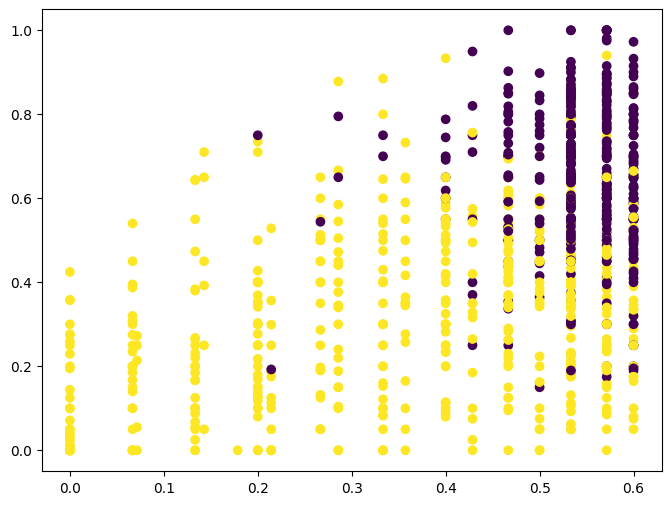

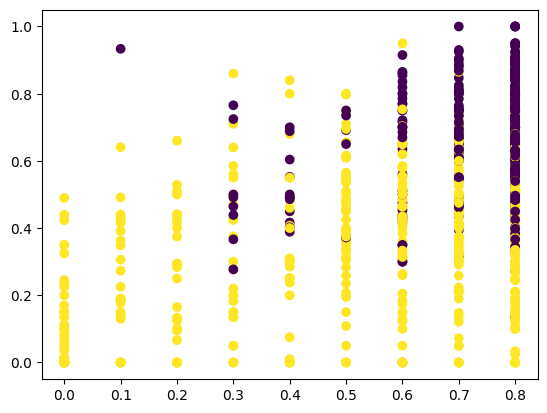

In [ ]:
plt.figure(figsize=(8,6))
# Посещение до Контрольная работа 1
# Контрольная работа 1
# Баллы до Контрольная работа 1
# Количество баллов до Контрольная работа 1
# Корень дисперсии баллов до Контрольная работа 1
plt.scatter(data["Количество баллов до Контрольная работа 1"],data['Контрольная работа 1'], c=data['Не сдал(-а)'])
plt.show()
plt.scatter(dataReal["Количество баллов до Контрольная работа 1"],dataReal['Контрольная работа 1'], c=dataReal['Не сдал(-а)'])
plt.show()

# plt.xlabel('Контрольная работа 1')
# plt.ylabel('Контрольная работа 2')

In [ ]:
from matplotlib import pyplot as plt
import plotly.express as px
# Посещение до Контрольная работа 1
# Контрольная работа 1
# Баллы до Контрольная работа 1
# Количество баллов до Контрольная работа 1
# Корень дисперсии баллов до Контрольная работа 1
# for ex in AnalysisFunc.exams:
fig = px.scatter_3d(dataReal, x=Посещение до Контрольная работа 1, y=f'Баллы до {ex}', z="Контрольная работа 1", color=dataReal["Не сдал(-а)"])
fig.show()

961

# Работа с направлениями

**Через LabelEncoder заменить Команды и Направление**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoderDirs = LabelEncoder()
labelencoderDirs.fit(dataReal["Направление"])
dataReal["Направление"] = labelencoderDirs.transform(dataReal["Направление"])

dataReal.head(5)

,Направление,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,2,1.0,1,0.3,0.048,0.3,0.30,0.050,0.2,0.025,0.133333,0.12,0.000,0.25,0.093,0.217391,0.26,0.000
1,21,0.0,0,0.7,0.160,0.8,1.00,0.455,0.8,0.090,0.266667,0.43,0.652,0.75,0.100,0.173913,0.28,0.550
2,12,1.0,1,1.0,0.000,0.0,0.00,0.150,0.8,0.000,0.000000,0.00,0.000,0.12,0.000,0.000000,0.00,0.000
3,11,1.0,1,0.9,0.020,0.2,0.12,0.095,1.0,0.085,0.200000,0.40,0.085,1.00,0.020,0.086957,0.06,0.285
4,12,1.0,1,0.5,0.020,0.1,0.12,0.190,0.2,0.000,0.000000,0.00,0.000,0.12,0.000,0.000000,0.00,0.000


In [ ]:
for ex in AnalysisFunc.exams:
    data[f'Баллы до {ex}'] = data[f'Баллы до {ex}'].div(data[f'Баллы до {ex}'].max())
    dataReal[f'Баллы до {ex}'] = dataReal[f'Баллы до {ex}'].div(dataReal[f'Баллы до {ex}'].max())

data.head(5)

,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Корень дисперсии баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Корень дисперсии баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Корень дисперсии баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,0.516129,0.533333,0.216933,0.600,1.0,0.260643,1.000000,0.000000,0.6000,0.43,0.43290,0.833333,0.159034,0.600
1,1.0,1,1.00,0.112903,0.200000,0.269942,0.369,1.0,0.052129,0.666667,0.045264,0.2245,1.00,0.00000,0.000000,0.000000,0.375
2,1.0,1,0.00,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0000,0.00,0.00000,0.000000,0.000000,0.000
3,0.0,0,1.00,0.483871,0.571429,0.208160,0.585,1.0,0.260643,0.750000,0.133156,0.5900,1.00,0.34632,0.666667,0.201164,0.775
4,0.0,1,0.86,0.516129,0.533333,0.422833,0.224,0.5,0.260643,1.000000,0.000000,0.5040,1.00,0.34632,0.666667,0.201164,0.750


In [ ]:
for ex in AnalysisFunc.exams:
    data[f'Средние баллы до {ex}'] =

data.head(5)

In [ ]:
from matplotlib import pyplot as plt
import plotly.express as px

for ex in AnalysisFunc.exams:
    # plt.scatter(data[f'Баллы до {ex}']/data[f'Посещение до {ex}'], data[f'Корень дисперсии баллов до {ex}'] , c=data["Не сдал(-а)"])
    # plt.show()
    fig = px.scatter_3d(x=data[f'Баллы до {ex}']/data[f'Посещение до {ex}'], y=data[f'Корень дисперсии баллов до {ex}'], z=data[f'Посещение до {ex}'], color=data["Не сдал(-а)"])
    fig.show()
    # fig = px.scatter_3d(data, x=f'Количество баллов до {ex}', y=f'Посещение до {ex}', z=ex, color=data["Не сдал(-а)"])
    # fig.show()

In [ ]:
labelEncoderOriginal = labelencoderDirs.inverse_transform(data["Направление"])
for name, group in dataReal.groupby("Направление"):
    dir = labelEncoderOriginal[group.loc(1)["Направление"].index][0]
    print(f"{dir}: {1-(group['Не сдал(-а)'].mean())}, {len(group)}")

In [ ]:
labelEncoderOriginal = labelencoderComands.inverse_transform(data["Команды"])
for name, group in data.groupby("Команды"):
    res = 1-(group['Не сдал(-а)'].mean())
    if res<0.6:
        dir = labelEncoderOriginal[group.loc(1)["Команды"].index][0]
        print(f"{dir}: {1-(group['Не сдал(-а)'].mean())}, {len(group)}")

# Распределение и выбросы

Контрольная работа 1: Max: 0.05, Min: 0.0, Mean: 0.02
Контрольная работа 2: Max: 0.05, Min: 0.0, Mean: 0.02
Контрольная работа 3: Max: 0.05, Min: 0.0, Mean: 0.03


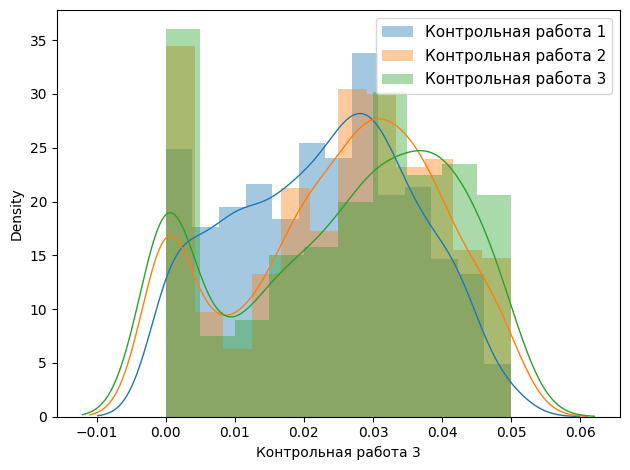

Баллы до Контрольная работа 1: Max: 0.31, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.2302, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.231, Min: 0.0, Mean: 0.07


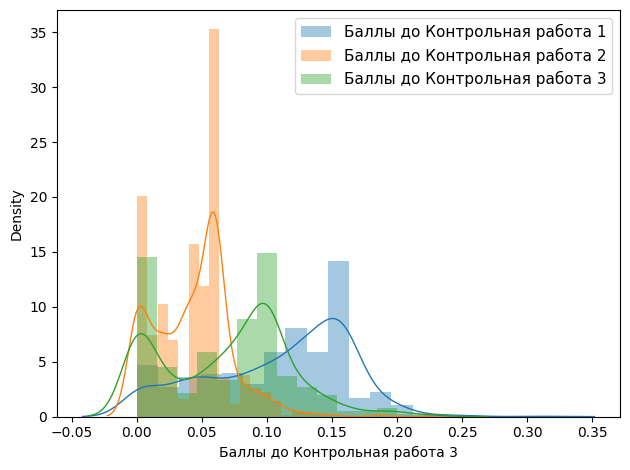

Посещение до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.79
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.78
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.76


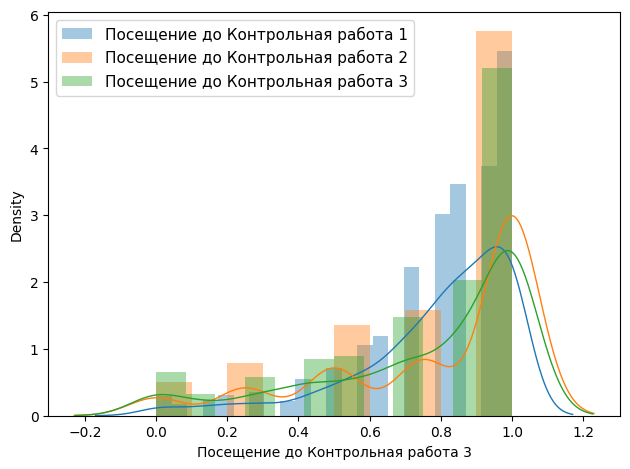

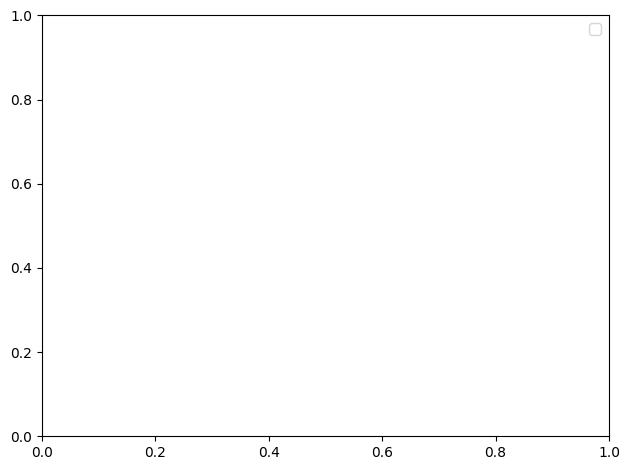

<Axes: >

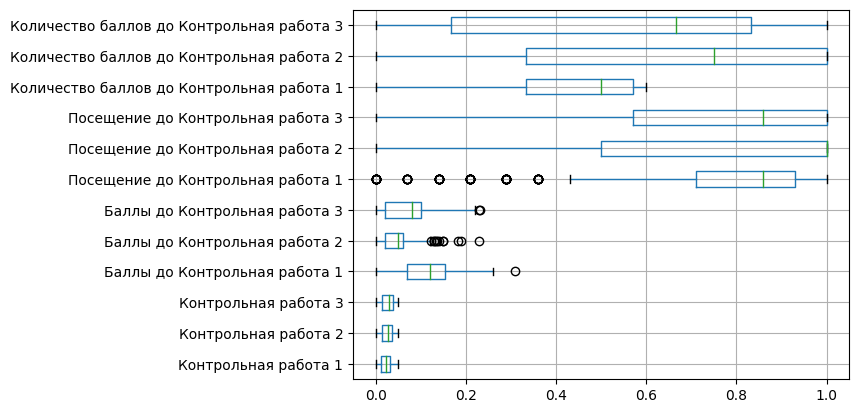

In [ ]:
AnalysisFunc.DrawPlots(data)

Контрольная работа 1: max = 26.0
Контрольная работа 2: max = 11.55
Контрольная работа 3: max = 22.0
902
Сдали: 754, не сдали: 148
Контрольная работа 1: Max: 0.2, Min: 0.0, Mean: 0.09
Контрольная работа 2: Max: 0.2, Min: 0.0, Mean: 0.1
Контрольная работа 3: Max: 0.2, Min: 0.0, Mean: 0.11


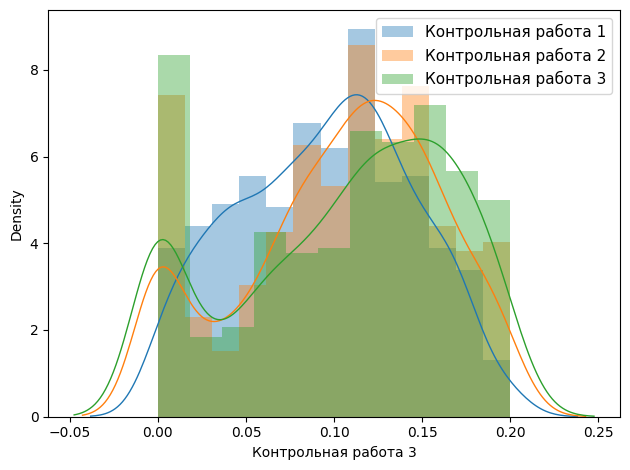

Баллы до Контрольная работа 1: Max: 0.26, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.1155, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.22, Min: 0.0, Mean: 0.07


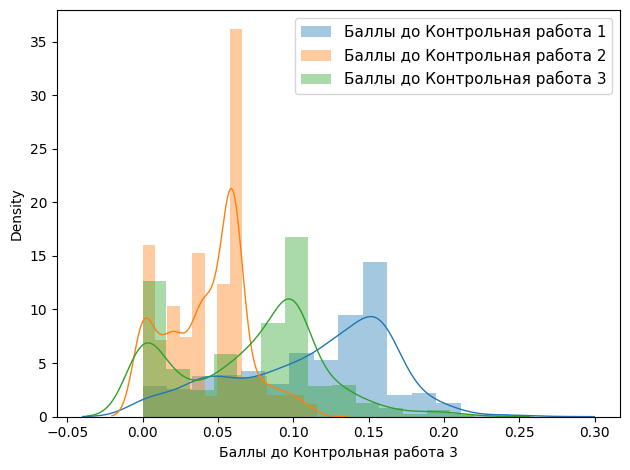

Посещение до Контрольная работа 1: Max: 1.0, Min: 0.29, Mean: 0.82
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.81
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.78


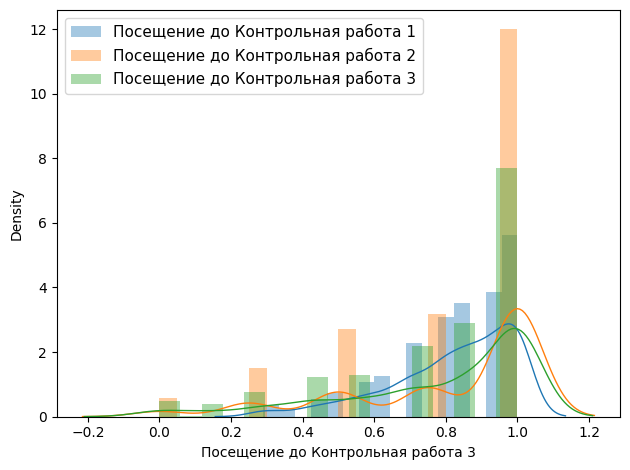

Процент баллов до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.44
Процент баллов до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.38
Процент баллов до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.32


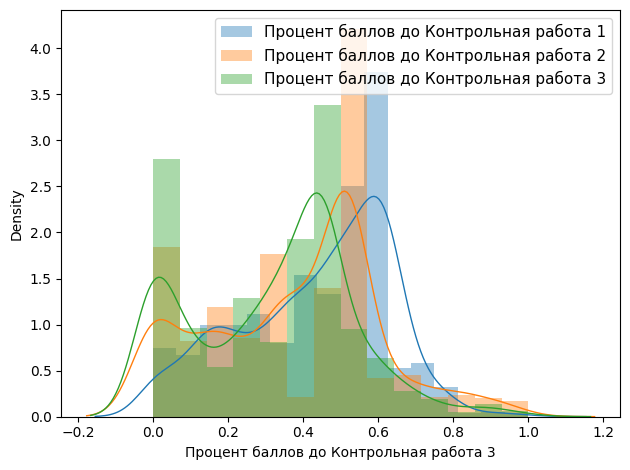

<Axes: >

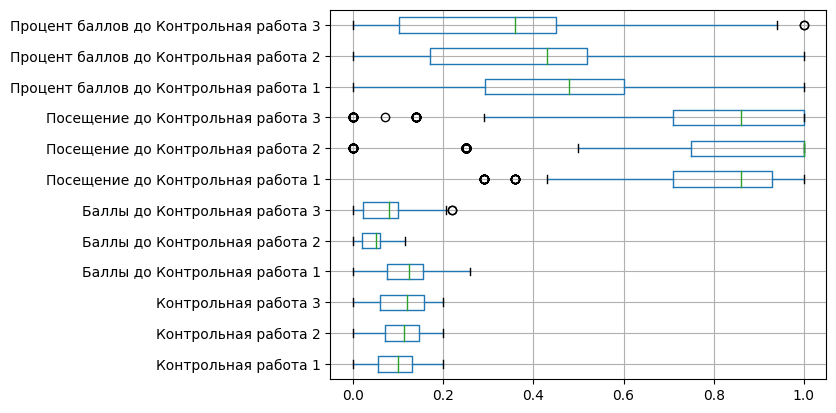

In [ ]:
data_Q = AnalysisFunc.DeleteByQuantile(data, 0.15)
print(len(data_Q))
print(f"Сдали: {len(data_Q[data_Q['Не сдал(-а)']==0])}, не сдали: {len(data_Q[data_Q['Не сдал(-а)']==1])}")

AnalysisFunc.DrawPlots(data_Q)

929
Сдали: 775, не сдали: 154
Контрольная работа 1: max = 26.0
Контрольная работа 2: max = 13.0
Контрольная работа 3: max = 20.6
929
Сдали: 775, не сдали: 154
Контрольная работа 1: Max: 0.2, Min: 0.0, Mean: 0.09
Контрольная работа 2: Max: 0.2, Min: 0.0, Mean: 0.1
Контрольная работа 3: Max: 0.2, Min: 0.0, Mean: 0.1


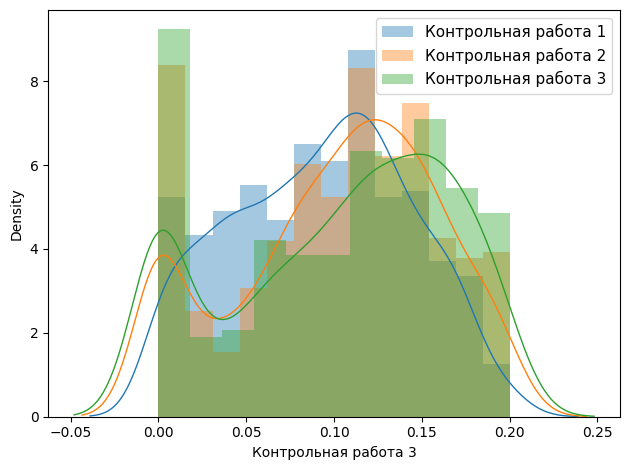

Баллы до Контрольная работа 1: Max: 0.26, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.13, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.20600000000000002, Min: 0.0, Mean: 0.07


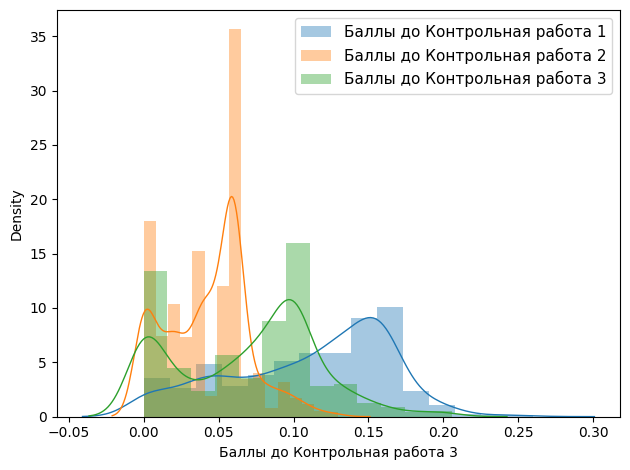

Посещение до Контрольная работа 1: Max: 1.0, Min: 0.14, Mean: 0.8
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.79
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.77


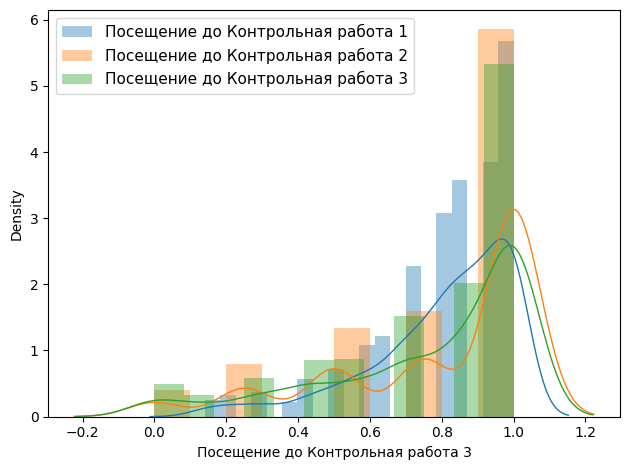

Процент баллов до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.43
Процент баллов до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.33
Процент баллов до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.34


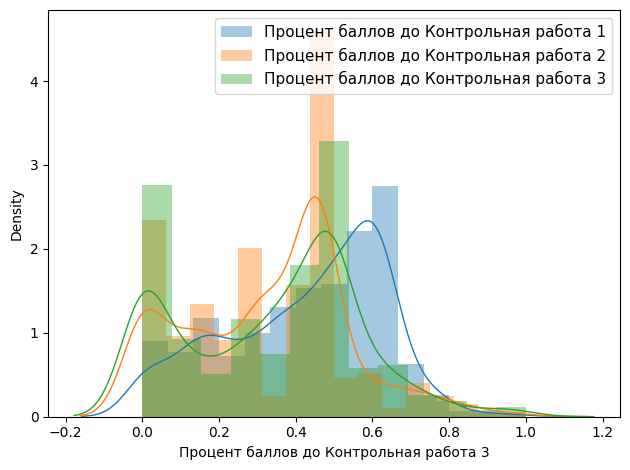

<Axes: >

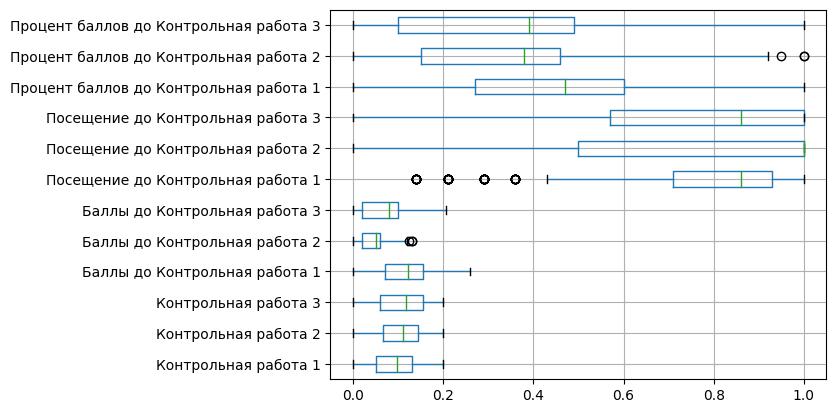

In [ ]:
data_Z = AnalysisFunc.DeleteByZ(data)
print(len(data_Z))
print(f"Сдали: {len(data_Z[data_Z['Не сдал(-а)']==0])}, не сдали: {len(data_Z[data_Z['Не сдал(-а)']==1])}")
AnalysisFunc.DrawPlots(data_Z)

In [ ]:
data_dict = {"Original": data, "Квартиль": data_Q, "По Z": data_Z}

# Корреляции

In [ ]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    for ex in AnalysisFunc.exams:
        print(d[d.loc[:, :ex].columns.difference(["Не сдал(-а)", "Оценка"])].corr()[ex].sort_values(ascending=False))
        print("__________________________")
    print(d.corr()["Не сдал(-а)"].sort_values(ascending=False))
    display(d[d.loc[:,:].columns.difference(["Оценка"]+AnalysisFunc.before)].corr().style.background_gradient(cmap='coolwarm'))
    print("///////////////////////////////\n")

Данные: Original
Контрольная работа 1                      1.000000
Процент баллов до Контрольная работа 1    0.569664
Баллы до Контрольная работа 1             0.569478
Посещение до Контрольная работа 1         0.466482
Пол                                      -0.025327
Name: Контрольная работа 1, dtype: float64
__________________________
Контрольная работа 2                      1.000000
Контрольная работа 1                      0.706044
Процент баллов до Контрольная работа 1    0.485494
Баллы до Контрольная работа 1             0.485301
Посещение до Контрольная работа 1         0.462351
Баллы до Контрольная работа 2             0.435484
Процент баллов до Контрольная работа 2    0.434535
Посещение до Контрольная работа 2         0.357982
Пол                                      -0.023922
Name: Контрольная работа 2, dtype: float64
__________________________
Контрольная работа 3                      1.000000
Контрольная работа 2                      0.755815
Контрольная работа 1       

,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3,Не сдал(-а),Пол,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3
Баллы до Контрольная работа 1,1.000000,0.576415,0.642922,0.569478,0.485301,0.545512,-0.427808,-0.151092,0.521959,0.402754,0.467990
Баллы до Контрольная работа 2,0.576415,1.000000,0.673618,0.406540,0.435484,0.496386,-0.370195,-0.151712,0.390145,0.392907,0.464367
Баллы до Контрольная работа 3,0.642922,0.673618,1.000000,0.447631,0.415312,0.494468,-0.395654,-0.159634,0.407009,0.352340,0.521599
Контрольная работа 1,0.569478,0.406540,0.447631,1.000000,0.706044,0.682988,-0.415969,-0.025327,0.466482,0.383007,0.425314
Контрольная работа 2,0.485301,0.435484,0.415312,0.706044,1.000000,0.755815,-0.396678,-0.023922,0.462351,0.357982,0.512101
Контрольная работа 3,0.545512,0.496386,0.494468,0.682988,0.755815,1.000000,-0.422425,-0.065320,0.478347,0.390422,0.578054
Не сдал(-а),-0.427808,-0.370195,-0.395654,-0.415969,-0.396678,-0.422425,1.000000,0.095608,-0.189801,-0.125488,-0.219819
Пол,-0.151092,-0.151712,-0.159634,-0.025327,-0.023922,-0.065320,0.095608,1.000000,-0.037905,-0.047831,-0.060147
Посещение до Контрольная работа 1,0.521959,0.390145,0.407009,0.466482,0.462351,0.478347,-0.189801,-0.037905,1.000000,0.583374,0.625330
Посещение до Контрольная работа 2,0.402754,0.392907,0.352340,0.383007,0.357982,0.390422,-0.125488,-0.047831,0.583374,1.000000,0.574381


///////////////////////////////

Данные: Квартиль
Контрольная работа 1                      1.000000
Баллы до Контрольная работа 1             0.517687
Процент баллов до Контрольная работа 1    0.517299
Посещение до Контрольная работа 1         0.348417
Пол                                      -0.025082
Name: Контрольная работа 1, dtype: float64
__________________________
Контрольная работа 2                      1.000000
Контрольная работа 1                      0.679710
Процент баллов до Контрольная работа 1    0.430986
Баллы до Контрольная работа 1             0.430465
Процент баллов до Контрольная работа 2    0.416805
Баллы до Контрольная работа 2             0.416326
Посещение до Контрольная работа 1         0.355007
Посещение до Контрольная работа 2         0.266968
Пол                                      -0.036736
Name: Контрольная работа 2, dtype: float64
__________________________
Контрольная работа 3                      1.000000
Контрольная работа 2                      0.7

,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3,Не сдал(-а),Пол,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3
Баллы до Контрольная работа 1,1.000000,0.576277,0.604456,0.517687,0.430465,0.498249,-0.448705,-0.157957,0.405374,0.304769,0.379189
Баллы до Контрольная работа 2,0.576277,1.000000,0.709652,0.426301,0.416326,0.494471,-0.402174,-0.186489,0.332931,0.364479,0.443147
Баллы до Контрольная работа 3,0.604456,0.709652,1.000000,0.407838,0.385135,0.468917,-0.404297,-0.167014,0.332477,0.286743,0.480862
Контрольная работа 1,0.517687,0.426301,0.407838,1.000000,0.679710,0.652002,-0.440276,-0.025082,0.348417,0.291263,0.345113
Контрольная работа 2,0.430465,0.416326,0.385135,0.679710,1.000000,0.729258,-0.420912,-0.036736,0.355007,0.266968,0.450063
Контрольная работа 3,0.498249,0.494471,0.468917,0.652002,0.729258,1.000000,-0.444402,-0.077956,0.390291,0.308902,0.531532
Не сдал(-а),-0.448705,-0.402174,-0.404297,-0.440276,-0.420912,-0.444402,1.000000,0.093693,-0.205633,-0.124630,-0.234376
Пол,-0.157957,-0.186489,-0.167014,-0.025082,-0.036736,-0.077956,0.093693,1.000000,-0.059808,-0.058323,-0.074436
Посещение до Контрольная работа 1,0.405374,0.332931,0.332477,0.348417,0.355007,0.390291,-0.205633,-0.059808,1.000000,0.478379,0.518087
Посещение до Контрольная работа 2,0.304769,0.364479,0.286743,0.291263,0.266968,0.308902,-0.124630,-0.058323,0.478379,1.000000,0.486820


///////////////////////////////

Данные: По Z
Контрольная работа 1                      1.000000
Баллы до Контрольная работа 1             0.546136
Процент баллов до Контрольная работа 1    0.545637
Посещение до Контрольная работа 1         0.418512
Пол                                      -0.016080
Name: Контрольная работа 1, dtype: float64
__________________________
Контрольная работа 2                      1.000000
Контрольная работа 1                      0.698953
Процент баллов до Контрольная работа 1    0.466108
Баллы до Контрольная работа 1             0.465766
Баллы до Контрольная работа 2             0.427629
Процент баллов до Контрольная работа 2    0.427232
Посещение до Контрольная работа 1         0.422204
Посещение до Контрольная работа 2         0.316432
Пол                                      -0.028180
Name: Контрольная работа 2, dtype: float64
__________________________
Контрольная работа 3                      1.000000
Контрольная работа 2                      0.74456

,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3,Не сдал(-а),Пол,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3
Баллы до Контрольная работа 1,1.000000,0.592797,0.629185,0.546136,0.465766,0.523117,-0.435254,-0.149036,0.477392,0.351712,0.428447
Баллы до Контрольная работа 2,0.592797,1.000000,0.715629,0.431308,0.427629,0.497938,-0.386532,-0.183003,0.382848,0.383473,0.466482
Баллы до Контрольная работа 3,0.629185,0.715629,1.000000,0.426556,0.413426,0.485600,-0.401631,-0.153223,0.385668,0.317201,0.513380
Контрольная работа 1,0.546136,0.431308,0.426556,1.000000,0.698953,0.670255,-0.425006,-0.016080,0.418512,0.338364,0.388076
Контрольная работа 2,0.465766,0.427629,0.413426,0.698953,1.000000,0.744565,-0.405084,-0.028180,0.422204,0.316432,0.488716
Контрольная работа 3,0.523117,0.497938,0.485600,0.670255,0.744565,1.000000,-0.427459,-0.063787,0.442409,0.350904,0.558707
Не сдал(-а),-0.435254,-0.386532,-0.401631,-0.425006,-0.405084,-0.427459,1.000000,0.092595,-0.193333,-0.117632,-0.227569
Пол,-0.149036,-0.183003,-0.153223,-0.016080,-0.028180,-0.063787,0.092595,1.000000,-0.042235,-0.049775,-0.069508
Посещение до Контрольная работа 1,0.477392,0.382848,0.385668,0.418512,0.422204,0.442409,-0.193333,-0.042235,1.000000,0.534816,0.575049
Посещение до Контрольная работа 2,0.351712,0.383473,0.317201,0.338364,0.316432,0.350904,-0.117632,-0.049775,0.534816,1.000000,0.533940


///////////////////////////////



# Считывание "нынешних данных"

In [10]:
dataReal = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Программирование и основы алгоритмизации тест.csv")
dataReal = dataReal.drop(dataReal.columns.difference(["Не сдал(-а)", "Пол"]+AnalysisFunc.GetAllColumnsTests(data)), axis=1)
dataReal = AnalysisFunc.MakeFloat(dataReal, ["Пол"])
# dataReal = dataReal.drop("Баллы", axis=1)
# dataReal[AnalysisFunc.exams+AnalysisFunc.scores] = AnalysisFunc.ModColumns100(dataReal, AnalysisFunc.exams+AnalysisFunc.scores)
# dataReal[AnalysisFunc.scores] = AnalysisFunc.ModColumns100(dataReal, AnalysisFunc.scores)
dataReal_before_min_max = dataReal.copy()
columns_to_scale_real = AnalysisFunc.exams + AnalysisFunc.before + AnalysisFunc.countscores + AnalysisFunc.sqrt_vars
dataReal[columns_to_scale] = AnalysisFunc.MinMaxColumns(dataReal, columns_to_scale)
dataReal[AnalysisFunc.scores] = dataReal[AnalysisFunc.scores].div(100)
print(len(dataReal))
print(f"Сдали: {len(data[data['Не сдал(-а)']==0])}, не сдали: {len(data[data['Не сдал(-а)']==1])}")

dataReal.head(5)

961
Сдали: 612, не сдали: 349


,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Количество баллов до Контрольная работа 1,Корень дисперсии баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Количество баллов до Контрольная работа 2,Корень дисперсии баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Количество баллов до Контрольная работа 3,Корень дисперсии баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,1,0.3,0.048,0.375,0.733212,0.050,0.2,0.025,0.50,0.193059,0.000,0.25,0.093,0.714286,0.191007,0.000
1,0.0,0,0.7,0.160,1.000,0.800000,0.455,0.8,0.090,1.00,0.239287,0.652,0.75,0.100,0.571429,0.248117,0.550
2,1.0,1,1.0,0.000,0.000,0.000000,0.150,0.8,0.000,0.00,0.000000,0.000,0.12,0.000,0.000000,0.000000,0.000
3,1.0,1,0.9,0.020,0.250,0.458258,0.095,1.0,0.085,0.75,0.365210,0.085,1.00,0.020,0.285714,0.253503,0.285
4,1.0,1,0.5,0.020,0.125,0.600000,0.190,0.2,0.000,0.00,0.137337,0.000,0.12,0.000,0.000000,0.092148,0.000


In [11]:
BaseFuncs.SaveFileCSV(path_to_data+"Преобразованные/", "ПиОА тест div20kr", dataReal, csv = True)


# Нахождение спысывальщиков

Рассматривается, когда через линейную регрессию баллы с прогнозом разняться на 8 и более баллов (причем прогноз выявил более низкие баллы, чем по факту)

Контрольная работа 1: 14 записей


,Баллы до Контрольная работа 1,Посещение до Контрольная работа 1,Разница прогноза,Контрольная работа 1
7,0.12,0.8,8.0,19.0
287,0.13,1.0,8.0,20.0
655,0.16,0.4,8.2,18.0
856,0.02,0.7,8.2,12.8
465,0.00,0.0,8.2,8.4
598,0.16,0.7,8.2,20.0
125,0.06,0.8,8.4,16.0
608,0.00,0.2,8.6,9.8
282,0.12,0.6,9.0,18.4
834,0.06,0.5,9.6,15.4


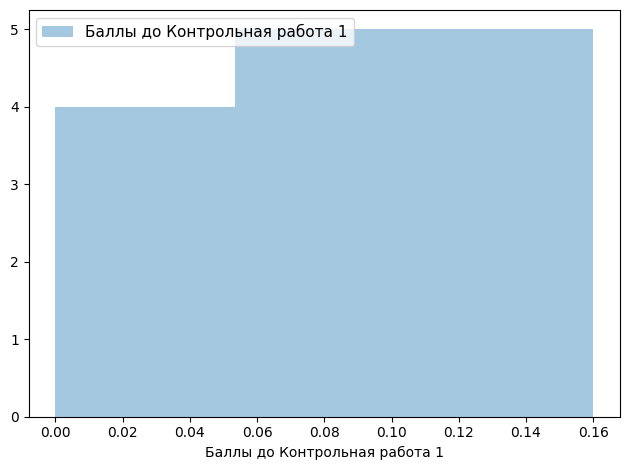

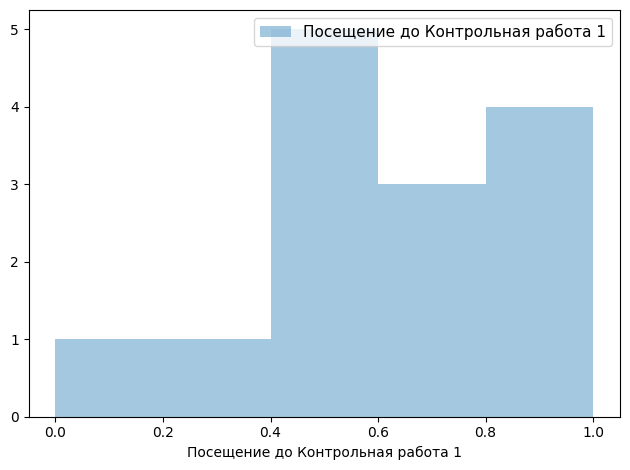

Контрольная работа 2: 40 записей


,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Разница прогноза,Контрольная работа 2
519,0.1122,0.1000,0.6,0.6,8.0,14.0
402,0.1380,0.0690,0.9,1.0,8.0,17.8
169,0.0840,0.0550,0.8,0.8,8.0,16.2
170,0.1000,0.0590,0.8,0.2,8.2,16.6
309,0.1400,0.0000,0.8,0.8,8.2,16.4
507,0.0300,0.0200,0.3,0.4,8.4,16.0
876,0.0400,0.0000,0.9,0.8,8.4,17.6
633,0.1400,0.0400,0.4,0.6,8.4,14.8
181,0.0750,0.0120,0.4,0.0,8.4,10.8
445,0.0860,0.0000,0.9,0.8,8.4,17.8


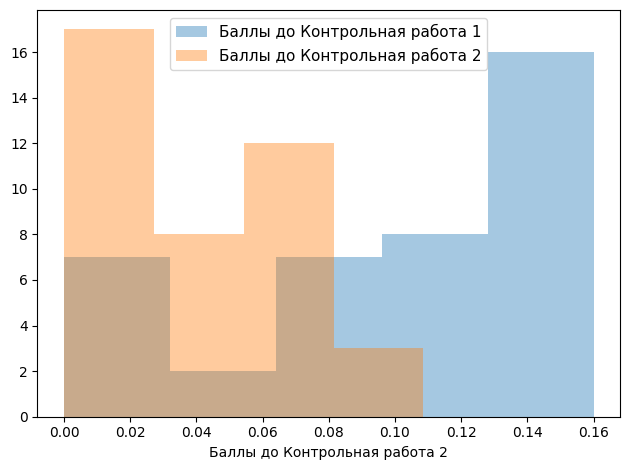

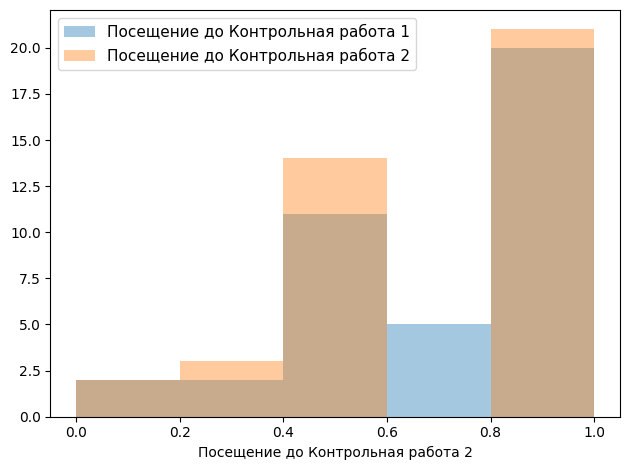

Контрольная работа 3: 56 записей


,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3,Разница прогноза,Контрольная работа 3
788,0.0850,0.0580,0.0580,0.1,0.4,0.25,8.0,9.0
257,0.1080,0.0800,0.0300,0.9,0.8,0.50,8.0,15.6
541,0.1002,0.0700,0.0774,0.9,0.8,0.75,8.0,16.2
445,0.0860,0.0000,0.0390,0.9,0.8,0.50,8.2,19.0
497,0.0000,0.0600,0.1050,0.9,0.6,0.38,8.4,13.0
666,0.1300,0.0500,0.0850,0.8,0.6,0.62,8.4,19.0
172,0.0830,0.0490,0.0900,0.8,1.0,0.50,8.4,11.4
421,0.1200,0.0572,0.1775,0.9,0.8,0.88,8.4,16.0
805,0.0700,0.1200,0.2000,1.0,1.0,1.00,8.4,18.0
700,0.0600,0.0400,0.0400,0.5,0.6,0.38,8.6,11.0


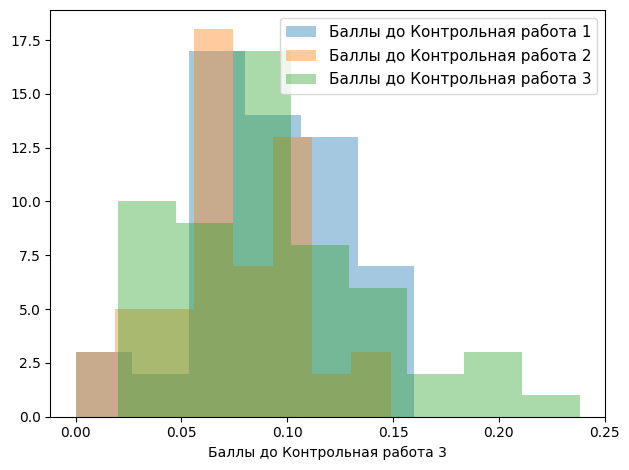

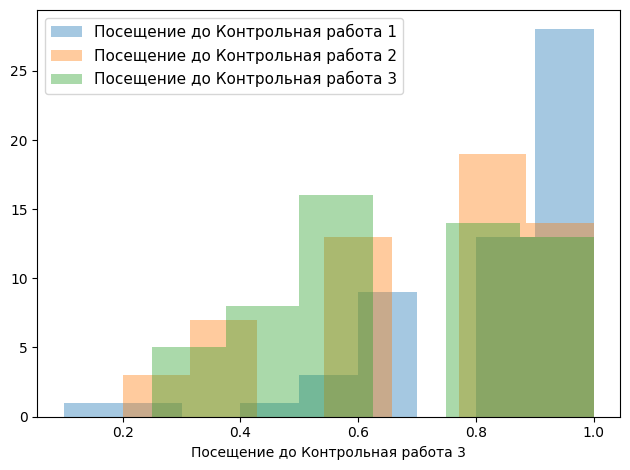

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import PredictionSplit, PredictionResults
from sklearn.linear_model import LinearRegression
model = LinearRegression()
for ex in AnalysisFunc.exams:
    X, Y, = PredictionSplit.SplitTestTrainTest(data, ex, [ "Оценка"]+AnalysisFunc.before)
    x_, y_ = PredictionSplit.SplitTestTrainTest(dataReal, ex, ["Оценка"]+AnalysisFunc.before)

    scores = [name  for name in x_.columns.to_list() if name.startswith("Баллы ")]
    being = [name  for name in x_.columns.to_list() if name.startswith("Посещение ")]

    model.fit(X, Y)
    data_prediction = model.predict(x_)
    data_prediction[data_prediction < 0] = 0
    mae = round(PredictionResults.accuracy_dict["mae"](y_.round(2), data_prediction.round(2)), 3)* 20
    x_[ex] = y_.round(2)* 20
    x_['Прогнозированная контрольная'] = data_prediction.round(2)* 20
    x_['Разница прогноза'] = x_[ex] - x_['Прогнозированная контрольная']
    x_ = x_[x_['Разница прогноза']>=8][scores+being+['Разница прогноза', ex]].sort_values(by='Разница прогноза', ascending=True)
    print(f"{ex}: {len(x_)} записей")
    display(x_)
    for i, lst in enumerate([scores, being]):
        for name in lst:
            subset = x_[name]
            sns.distplot(a=subset, hist = True, kde = False,
                        kde_kws = {'linewidth': 1},
                        label = name)
        plt.legend(prop={'size': 11})
        plt.tight_layout()
        plt.show()